# Indigenous Population

### Import libraries and data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in B01 Table (2011): Selected Labour Force, Education and Migration Characteristics by Sex
b01 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B01_NSW_SA2_short.csv')

#read in G01 Table (2016): Selected Labour Force, Education and Migration Characteristics by Sex
g01 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G01_NSW_SA2.csv')

#read in the correspondence file 2011<->2016
corr = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_2016_correspondence\\2011_2016_corr.csv')

### Cleaning Table B01 (2011)

In [3]:
print(list(b01.columns))

['region_id', 'Tot_P_M', 'Tot_P_F', 'Tot_P_P', 'Age_0_4_yr_M', 'Age_0_4_yr_F', 'Age_0_4_yr_P', 'Age_5_14_yr_M', 'Age_5_14_yr_F', 'Age_5_14_yr_P', 'Age_15_19_yr_M', 'Age_15_19_yr_F', 'Age_15_19_yr_P', 'Age_20_24_yr_M', 'Age_20_24_yr_F', 'Age_20_24_yr_P', 'Age_25_34_yr_M', 'Age_25_34_yr_F', 'Age_25_34_yr_P', 'Age_35_44_yr_M', 'Age_35_44_yr_F', 'Age_35_44_yr_P', 'Age_45_54_yr_M', 'Age_45_54_yr_F', 'Age_45_54_yr_P', 'Age_55_64_yr_M', 'Age_55_64_yr_F', 'Age_55_64_yr_P', 'Age_65_74_yr_M', 'Age_65_74_yr_F', 'Age_65_74_yr_P', 'Age_75_84_yr_M', 'Age_75_84_yr_F', 'Age_75_84_yr_P', 'Age_85ov_M', 'Age_85ov_F', 'Age_85ov_P', 'Counted_Census_Night_home_M', 'Counted_Census_Night_home_F', 'Counted_Census_Night_home_P', 'Count_Census_Nt_Ewhere_Aust_M', 'Count_Census_Nt_Ewhere_Aust_F', 'Count_Census_Nt_Ewhere_Aust_P', 'Indigenous_psns_Aboriginal_M', 'Indigenous_psns_Aboriginal_F', 'Indigenous_psns_Aboriginal_P', 'Indig_psns_Torres_Strait_Is_M', 'Indig_psns_Torres_Strait_Is_F', 'Indig_psns_Torres_Strait_

In [4]:
b01 = b01[['region_id', 'Tot_P_P', 'Indigenous_P_Tot_P']]

In [5]:
b01.rename(columns={'region_id':'SA2_MAINCODE_2011',
                    'Tot_P_P':'total_pop',
                    'Indigenous_P_Tot_P':'indig_pop'}, inplace=True)

### Correspondence of 2011 data to 2016 SA2s

In [20]:
indig_2011 = pd.merge(b01,corr,on='SA2_MAINCODE_2011',how='right')

In [21]:
#apply correspondence ratio

indig_2011['total_11_sa2'] = indig_2011['total_pop'] * indig_2011['RATIO']
indig_2011['indig_11_sa2'] = indig_2011['indig_pop'] * indig_2011['RATIO']

In [22]:
#pull csv and pivot in Excel

indig_2011.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\indig_2011.csv',index=False)

In [23]:
#read back in pivoted data

indig_2011_sa2 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\indig_2011_sa2.csv')

### Cleaning Table G01 (2016)

In [24]:
print(list(g01.columns))

['SA2_MAINCODE_2016', 'Tot_P_M', 'Tot_P_F', 'Tot_P_P', 'Age_0_4_yr_M', 'Age_0_4_yr_F', 'Age_0_4_yr_P', 'Age_5_14_yr_M', 'Age_5_14_yr_F', 'Age_5_14_yr_P', 'Age_15_19_yr_M', 'Age_15_19_yr_F', 'Age_15_19_yr_P', 'Age_20_24_yr_M', 'Age_20_24_yr_F', 'Age_20_24_yr_P', 'Age_25_34_yr_M', 'Age_25_34_yr_F', 'Age_25_34_yr_P', 'Age_35_44_yr_M', 'Age_35_44_yr_F', 'Age_35_44_yr_P', 'Age_45_54_yr_M', 'Age_45_54_yr_F', 'Age_45_54_yr_P', 'Age_55_64_yr_M', 'Age_55_64_yr_F', 'Age_55_64_yr_P', 'Age_65_74_yr_M', 'Age_65_74_yr_F', 'Age_65_74_yr_P', 'Age_75_84_yr_M', 'Age_75_84_yr_F', 'Age_75_84_yr_P', 'Age_85ov_M', 'Age_85ov_F', 'Age_85ov_P', 'Counted_Census_Night_home_M', 'Counted_Census_Night_home_F', 'Counted_Census_Night_home_P', 'Count_Census_Nt_Ewhere_Aust_M', 'Count_Census_Nt_Ewhere_Aust_F', 'Count_Census_Nt_Ewhere_Aust_P', 'Indigenous_psns_Aboriginal_M', 'Indigenous_psns_Aboriginal_F', 'Indigenous_psns_Aboriginal_P', 'Indig_psns_Torres_Strait_Is_M', 'Indig_psns_Torres_Strait_Is_F', 'Indig_psns_Torres

In [25]:
indig_2016 = g01[['SA2_MAINCODE_2016', 'Indigenous_P_Tot_P', 'Tot_P_P']]

In [26]:
indig_2016.rename(columns={'Tot_P_P':'total_16',
                           'Indigenous_P_Tot_P':'indig_16'}, inplace=True)

### Merge 2011 and 2016 Tables

In [27]:
indig = pd.merge(indig_2011_sa2,indig_2016,on='SA2_MAINCODE_2016',how="right")

### Merge SA2 Shapes for Sydney UCL Area

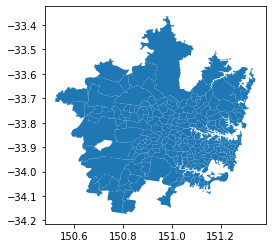

In [28]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

In [29]:
#merge 2011 and 2016 data with UCL SA2 data
indigenous = pd.merge(syd_ucl, indig, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
indigenous

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,indig_11_sa2,total_11_sa2,indig_16,total_16
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,87.000000,21348.000000,124,22944
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,56.000000,18616.000000,81,20066
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,16.999997,5831.998834,34,6251
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,18.000000,12446.000000,37,12639
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,27.319032,7212.487131,21,7611
5,115011554,11554,Castle Hill - East,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,2.0720,"POLYGON ((151.02112 -33.71443, 151.02148 -33.7...",115011554,9.159632,5578.215888,13,5593
6,115011555,11555,Castle Hill - North,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,6.8149,"POLYGON ((150.98369 -33.70475, 150.98364 -33.7...",115011555,43.059682,11368.169980,39,11885
7,115011556,11556,Castle Hill - South,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1277,"POLYGON ((151.00308 -33.73490, 151.00317 -33.7...",115011556,33.621286,8876.342891,38,9517
8,115011557,11557,Castle Hill - West,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,1.6363,"POLYGON ((150.96740 -33.71677, 150.96705 -33.7...",115011557,15.376470,5145.919770,14,5241
9,115011558,11558,Cherrybrook,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.2514,"POLYGON ((151.03389 -33.71908, 151.03393 -33.7...",115011558,30.840368,18781.784110,51,18765


### Calculate Relevant Stats

In [30]:
indigenous['indig_11_sa2'].describe(percentiles=[.2,.4,.6,.8])

count     265.000000
mean      164.424384
std       208.564775
min         0.000000
20%        40.000000
40%        72.000000
50%        93.000000
60%       115.800000
80%       235.064471
max      1631.000000
Name: indig_11_sa2, dtype: float64

In [35]:
indigenous['indig_16'].describe(percentiles=[.2,.4,.6,.8])

count     265.000000
mean      205.392453
std       256.584229
min         0.000000
20%        49.800000
40%        91.600000
50%       115.000000
60%       144.600000
80%       273.800000
max      1761.000000
Name: indig_16, dtype: float64

In [37]:
indigenous['indig_pct_11'] = ((indigenous['indig_11_sa2']) / (indigenous['total_11_sa2']))
indigenous['indig_pct_16'] = ((indigenous['indig_16']) / (indigenous['total_16']))

In [38]:
indigenous['indig_pct_11'].describe(percentiles=[.2,.4,.6,.8])

count    263.000000
mean       0.010485
std        0.011930
min        0.000000
20%        0.003138
40%        0.004867
50%        0.006479
60%        0.008495
80%        0.015597
max        0.087702
Name: indig_pct_11, dtype: float64

In [39]:
indigenous['indig_pct_16'].describe(percentiles=[.2,.4,.6,.8])

count    264.000000
mean       0.011886
std        0.013661
min        0.000000
20%        0.003351
40%        0.005923
50%        0.007341
60%        0.008833
80%        0.016322
max        0.085823
Name: indig_pct_16, dtype: float64

In [41]:
indigenous['indig_ovregmed_11'] = np.where((indigenous['indig_11_sa2'] > 93),1,0)
indigenous['indig_ovregmed_16'] = np.where((indigenous['indig_16'] > 115),1,0)

### Export to CSV

In [42]:
indigenous['indig_11'] = indigenous['indig_11_sa2']

In [43]:
output_csv = indigenous[['SA2_MAINCODE_2016','indig_11','indig_16','indig_ovregmed_11','indig_ovregmed_16']]
output_csv.to_csv('indigenous.csv')

### Map Indigenous Population

Text(0.5, 1, 'Indigenous Population')

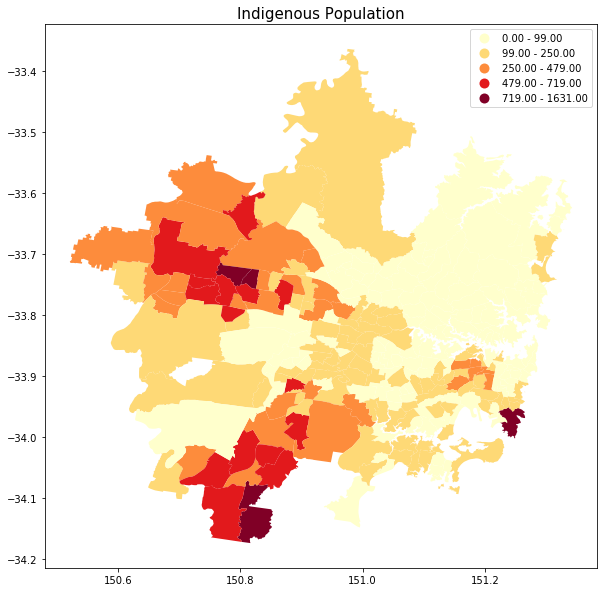

In [32]:
figure, ax = plt.subplots(figsize=(12,10))
base = indigenous.plot(column='indig_11_sa2', scheme='fisher_jenks', k=5, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title('Indigenous Population, 2011', fontdict={'fontsize':15})

Text(0.5, 1, 'Indigenous Population, 2011')

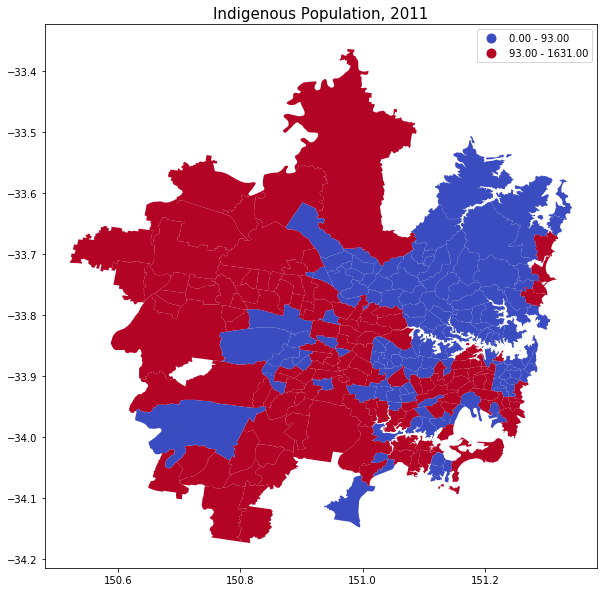

In [34]:
figure, ax = plt.subplots(figsize=(12,10))
base = indigenous.plot(column='indig_11_sa2', scheme='user_defined', classification_kwds={'bins':[93]}, legend=True, ax=ax, cmap="coolwarm")
ax.set_title('Indigenous Population, 2011', fontdict={'fontsize':15})

Text(0.5, 1, 'Indigenous Population, 2011')

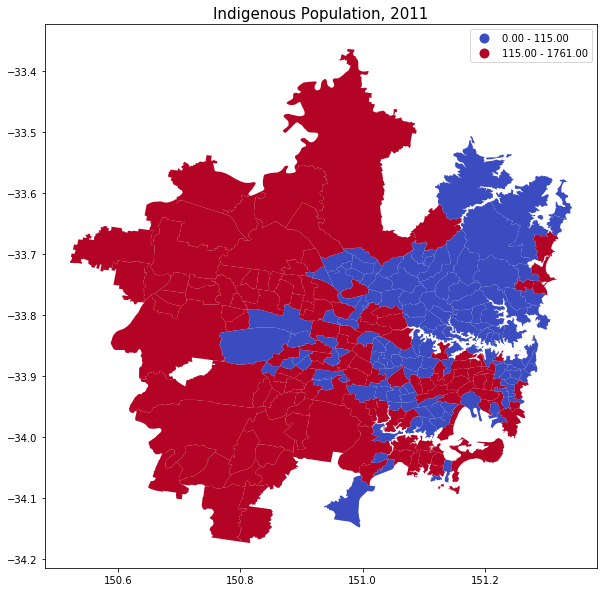

In [36]:
figure, ax = plt.subplots(figsize=(12,10))
base = indigenous.plot(column='indig_16', scheme='user_defined', classification_kwds={'bins':[115]}, legend=True, ax=ax, cmap="coolwarm")
ax.set_title('Indigenous Population, 2011', fontdict={'fontsize':15})